Dataset preview:
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  .

c:\Users\USER\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


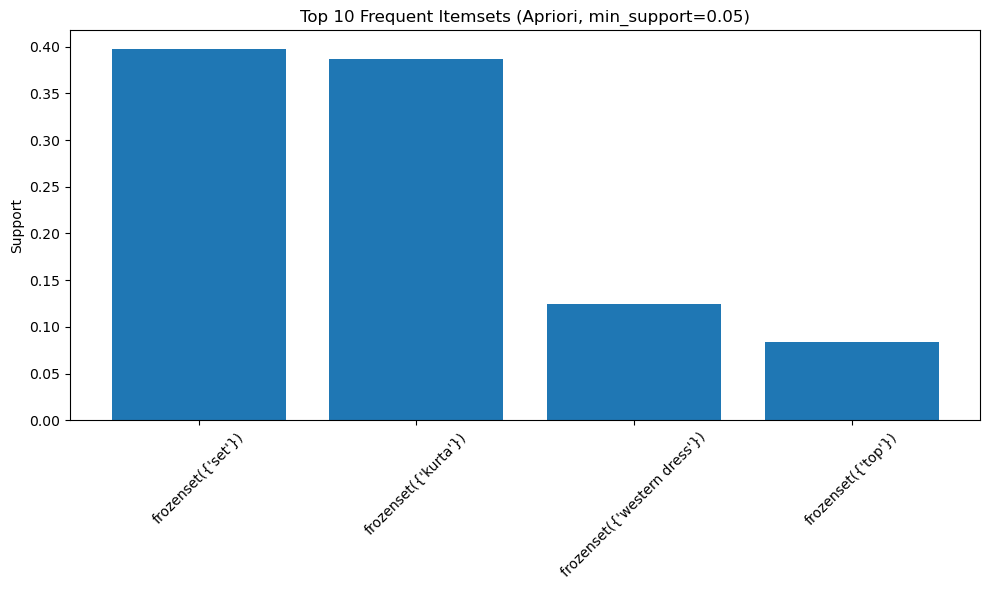


=== FP-Growth (min_support=0.05) ===


c:\Users\USER\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 10 frequent itemsets:
    support         itemsets
1  0.397456            (set)
0  0.386790          (kurta)
3  0.124558  (western dress)
2  0.084359            (top)
Top 5 rules by lift:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


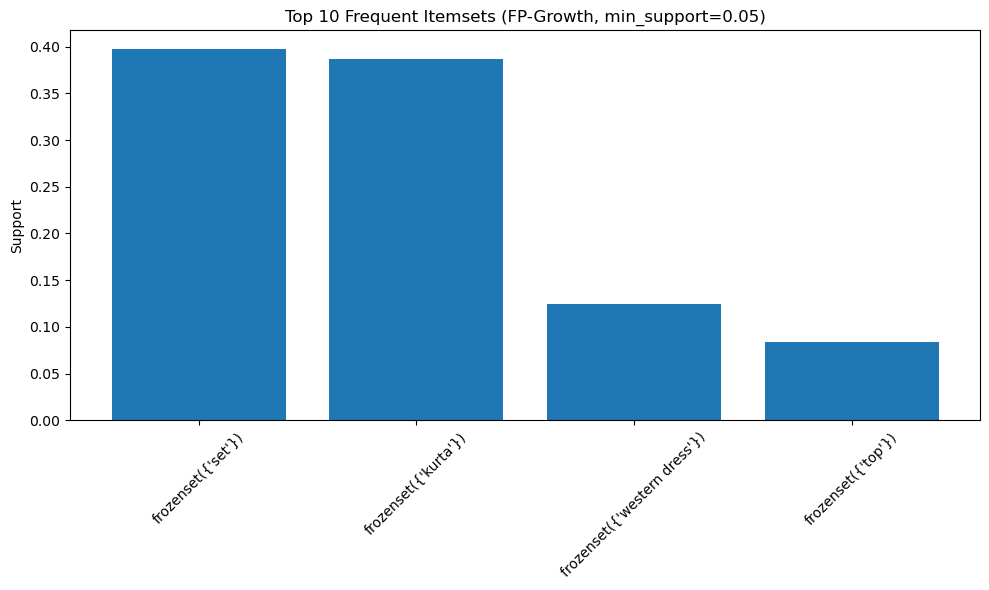


=== Apriori (min_support=0.1) ===
Top 10 frequent itemsets:
    support         itemsets
1  0.397456            (set)
0  0.386790          (kurta)
2  0.124558  (western dress)


c:\Users\USER\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


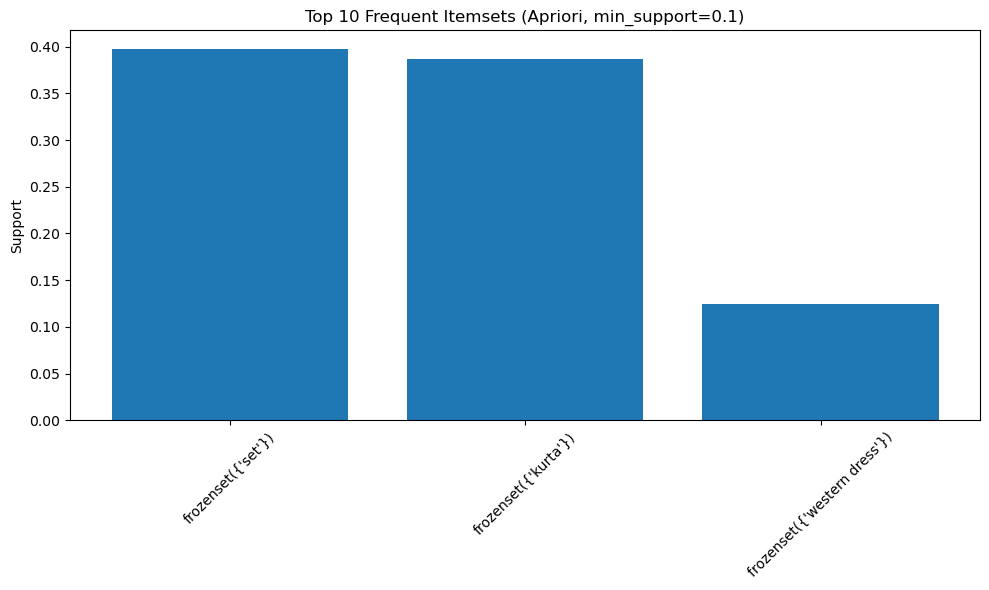


=== FP-Growth (min_support=0.1) ===


c:\Users\USER\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 10 frequent itemsets:
    support         itemsets
1  0.397456            (set)
0  0.386790          (kurta)
2  0.124558  (western dress)
Top 5 rules by lift:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


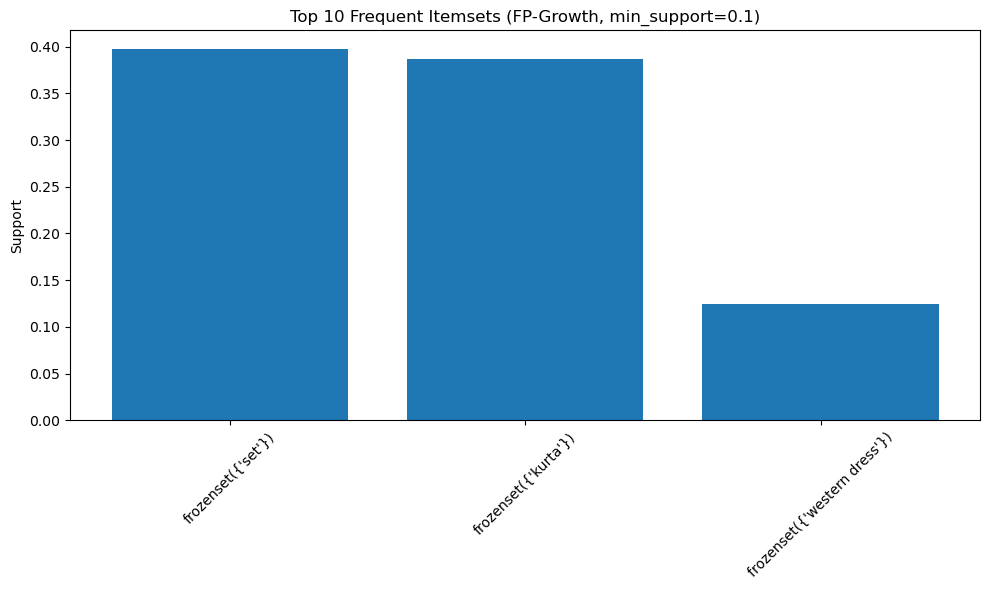


Top 3 rules by lift for FP-Growth:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [ ]:
# =============================
# DSA 2040 - Association Rule Mining
# Author: Gachunga Gift
# Dataset: Amazon Sale Report.csv
# =============================

import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from itertools import combinations
from collections import Counter
import os

# =============================
# STEP 0: Folder Setup
# =============================
# Ensure folders exist
os.makedirs("../data", exist_ok=True)      # dataset folder
os.makedirs("../notebooks", exist_ok=True) # notebook folder
os.makedirs("../visuals", exist_ok=True)   # plot visuals folder

# =============================
# STEP 1: Load and Clean Data
# =============================
df = pd.read_csv("../data/Amazon Sale Report.csv", encoding='latin1', low_memory=False)
print("Dataset preview:")
print(df.head())
print("Shape:", df.shape)

# Remove duplicates and missing values
df_clean = df[['Order ID', 'Category']].drop_duplicates().dropna()
df_clean['Order ID'] = df_clean['Order ID'].astype(str)
df_clean['Category'] = df_clean['Category'].str.strip().str.lower()

# Convert transactions to list of items per order
transactions = df_clean.groupby('Order ID')['Category'].apply(list).tolist()
print("Number of transactions:", len(transactions))

# Get all unique items
all_items = sorted({item for t in transactions for item in t})

# One-hot encode transactions
onehot = [[1 if item in t else 0 for item in all_items] for t in transactions]
basket_df = pd.DataFrame(onehot, columns=all_items)
print("One-hot encoded basket preview:")
print(basket_df.head())

# =============================
# STEP 2: Frequent Itemset Mining
# =============================
support_thresholds = [0.05, 0.1]

for support in support_thresholds:
    # --- Apriori ---
    print(f"\n=== Apriori (min_support={support}) ===")
    apriori_itemsets = apriori(basket_df, min_support=support, use_colnames=True)
    apriori_itemsets.sort_values(by='support', ascending=False, inplace=True)
    print("Top 10 frequent itemsets:")
    print(apriori_itemsets.head(10))
    
    # Plot
    top10 = apriori_itemsets.head(10)
    plt.figure(figsize=(10,6))
    plt.bar(top10['itemsets'].astype(str), top10['support'])
    plt.xticks(rotation=45)
    plt.ylabel("Support")
    plt.title(f"Top 10 Frequent Itemsets (Apriori, min_support={support})")
    plt.tight_layout()
    plt.savefig(f"../visuals/apriori_top10_{int(support*100)}.png")
    plt.show()
    
    # --- FP-Growth ---
    print(f"\n=== FP-Growth (min_support={support}) ===")
    fpg_itemsets = fpgrowth(basket_df, min_support=support, use_colnames=True)
    fpg_itemsets.sort_values(by='support', ascending=False, inplace=True)
    print("Top 10 frequent itemsets:")
    print(fpg_itemsets.head(10))
    
    # Generate association rules
    fpg_rules = association_rules(fpg_itemsets, metric="lift", min_threshold=1.0)
    fpg_rules.sort_values(by='lift', ascending=False, inplace=True)
    print("Top 5 rules by lift:")
    print(fpg_rules.head(5))
    
    # Plot top 10 FP-Growth itemsets
    top10 = fpg_itemsets.head(10)
    plt.figure(figsize=(10,6))
    plt.bar(top10['itemsets'].astype(str), top10['support'])
    plt.xticks(rotation=45)
    plt.ylabel("Support")
    plt.title(f"Top 10 Frequent Itemsets (FP-Growth, min_support={support})")
    plt.tight_layout()
    plt.savefig(f"../visuals/fpgrowth_top10_{int(support*100)}.png")
    plt.show()

# =============================
# STEP 3: Interpret Top Rules
# =============================
top_rules = fpg_rules.head(3)
print("\nTop 3 rules by lift for FP-Growth:")
print(top_rules[['antecedents','consequents','support','confidence','lift']])
